In [1]:
from Baby_TensorFlow import *

In [2]:
layer_sequence = [1,'ReLU', 2, 'sigmoid', 3]
loss_function = 'MSLE'

nn = NN(layer_sequence, loss_function)

# Avaliable Class Properties
print('activation func library:\n', nn.activation_funcs_library, '\n')
print('loss func library:\n', nn.loss_funcs_library, '\n')
print('current weights:\n', nn.weights, '\n')
print('current activation functions:\n', nn.activation_funcs, '\n')
print('current loss function:\n', nn.loss_func_label, ':', nn.loss_func, '\n')
print('traing error:\n', nn.training_err, '\n')

activation func library:
 {'sigmoid': '1/(1+exp(-x))', 'tanh': 'tanh(x)', 'ReLU': 'Piecewise((0,x<0),(x, x>=0))'} 

loss func library:
 {'MSE': '(y - y_hat)**2', 'MAE': 'Abs(y - y_hat)', 'MAPE': '100 * Abs((y - y_hat) / (y + y_hat))', 'MSLE': '(log(y + 1.) - log(y_hat + 1.))**2', 'BCE': '-(y_hat*log(y) + (1 - y_hat)*log(1 - y))', 'Poisson': 'y - y_hat * log(y)'} 

current weights:
 [array([[-1.10567005,  1.28929671],
       [-1.07058189, -1.50270822]]), array([[-0.40249555,  1.00743997,  0.79915986],
       [-0.73564408, -0.25793338, -0.62158822],
       [ 0.6507594 ,  1.09441859,  0.72596952]])] 

current activation functions:
 [Piecewise((0, x < 0), (x, True)), 1/(1 + exp(-x))] 

current loss function:
 MSLE : (log(y + 1.0) - log(y_hat + 1.0))**2 

traing error:
 None 



# Example with MNIST Data for all 10 Labels

In [3]:
''' For Dataset Usage '''
from keras.datasets import mnist

In [4]:
########################### Training Data Prep ###########################

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = (x_train.astype('float32') / 255.).reshape(len(x_train), len(x_train[0])*len(x_train[0][0]))
x_test = (x_test.astype('float32') / 255.).reshape(len(x_test), len(x_test[0])*len(x_test[0][0]))

num_data_pts = 1000

x_train = x_train[0:num_data_pts]
y_train = One_Hot_Encode(y_train[0:num_data_pts])

input_shape = x_train[0].size
output_shape = y_train[0].size

########################### Testing Data Prep ############################

num_test_evals = 1000

x_test = x_test[0:num_test_evals]
y_test = One_Hot_Encode(y_test[0:num_test_evals])

##########################################################################

training: 100%|██████████| 1000/1000 [00:05<00:00, 171.59it/s]


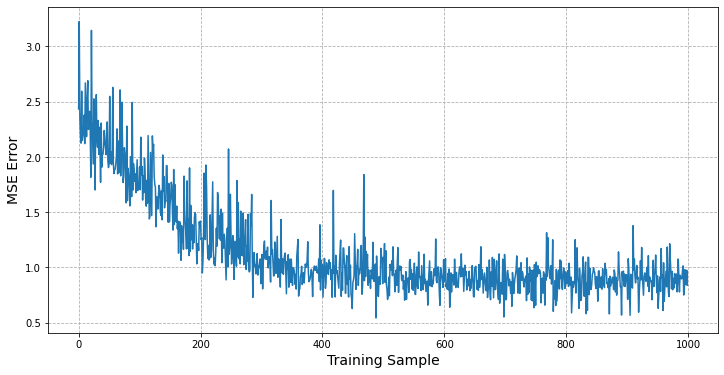

Evaluating Test Data: 100%|██████████| 1000/1000 [00:02<00:00, 477.97it/s]

% Correct: 26.3
% Wrong: 73.7

Model saved at Saved Models/Saved_Model



In [5]:
############################## Build network ##############################

# layer_sequence = [input_shape, 'ReLU', 392, 'ReLU', 196, 'ReLU', 98, 'ReLU', 49, 'sigmoid', output_shape]
layer_sequence = [input_shape, 'ReLU', 100, 'sigmoid', output_shape] # initialize the layer sequences and corresponding activations

loss_function = 'MSE' # declare the loss function

nn = NN(layer_sequence, loss_function) # Build a model 

################################# Run it ##################################

nn.train(x_train, y_train, batch_size = 5, epsilon = 0.01, visualize = True)

################################# Testing ##################################

nn.evaluate(x_test, y_test)

nn.save_model()

# Comparison of Different Loss functions

In [8]:
########################### Training Data Prep ###########################

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = (x_train.astype('float32') / 255.).reshape(len(x_train), len(x_train[0])*len(x_train[0][0]))
x_test = (x_test.astype('float32') / 255.).reshape(len(x_test), len(x_test[0])*len(x_test[0][0]))

num_data_pts = 1000

x_train = x_train[0:num_data_pts]
y_train = One_Hot_Encode(y_train[0:num_data_pts])

input_shape = x_train[0].size
output_shape = y_train[0].size

########################### Testing Data Prep ############################

num_test_evals = 1000

x_test = x_test[0:num_test_evals]
y_test = One_Hot_Encode(y_test[0:num_test_evals])

##########################################################################

In [9]:
# layer_sequence = [input_shape, 'ReLU', 392, 'ReLU', 196, 'ReLU', 98, 'ReLU', 49, 'sigmoid', output_shape]
layer_sequence = [input_shape, 'ReLU', 100, 'sigmoid', output_shape] # initialize the layer sequences and corresponding activations


##########################################################################
############################## Build network #############################
##########################################################################
loss_function = 'MSE'

nn1 = NN(layer_sequence, loss_function) # Build model 

################################# Run it ##################################

nn1.train(x_train, y_train, batch_size = 5, epsilon = 0.01, visualize = False)

##########################################################################
##########################################################################
##########################################################################

##########################################################################
############################## Build network #############################
##########################################################################

loss_function = 'MAE'

nn2 = NN(layer_sequence, loss_function) # Build model 

################################# Run it ##################################

nn2.train(x_train, y_train, batch_size = 5, epsilon = 0.01, visualize = False)

##########################################################################
##########################################################################
##########################################################################

##########################################################################
############################## Build network #############################
##########################################################################

loss_function = 'MAPE'

nn3 = NN(layer_sequence, loss_function) # Build model 

################################# Run it ##################################

nn3.train(x_train, y_train, batch_size = 5, epsilon = 0.01, visualize = False)

##########################################################################
##########################################################################
##########################################################################

##########################################################################
############################## Build network #############################
##########################################################################

loss_function = 'MSLE'

nn4 = NN(layer_sequence, loss_function) # Build model 

################################# Run it ##################################

nn4.train(x_train, y_train, batch_size = 5, epsilon = 0.01, visualize = False)

##########################################################################
##########################################################################
##########################################################################

training: 100%|██████████| 1000/1000 [00:07<00:00, 131.67it/s]


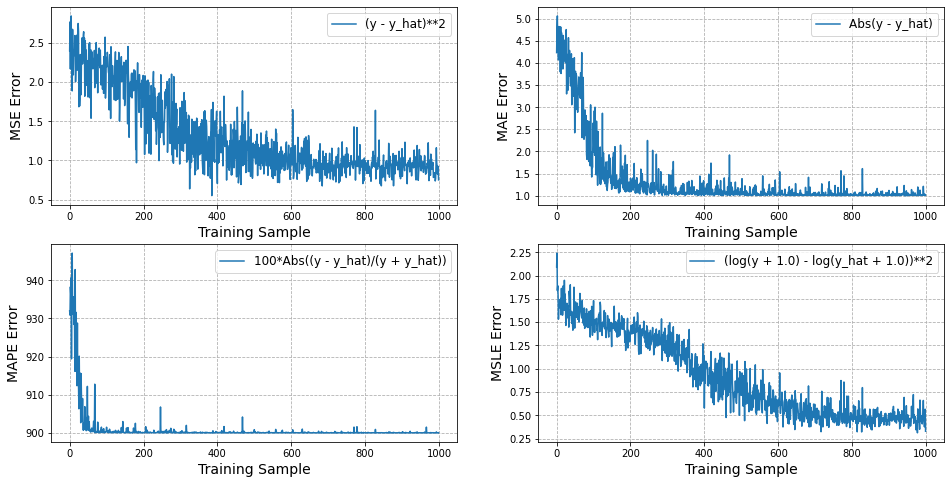

In [10]:
fig, ax = plt.subplots(2,2, figsize = (16,8))
            
ax[0][0].plot(nn1.training_err, label = '%s' % str(nn1.loss_func)) # to visualize error over time
ax[0][0].set_xlabel('Training Sample', fontsize = 14)
ax[0][0].set_ylabel('%s Error' % nn1.loss_func_label, fontsize = 14)
ax[0][0].grid(linestyle = '--')
ax[0][0].legend(fontsize = 12)

ax[0][1].plot(nn2.training_err, label = '%s' % str(nn2.loss_func)) # to visualize error over time
ax[0][1].set_xlabel('Training Sample', fontsize = 14)
ax[0][1].set_ylabel('%s Error' % nn2.loss_func_label, fontsize = 14)
ax[0][1].grid(linestyle = '--')
ax[0][1].legend(fontsize = 12)

ax[1][0].plot(nn3.training_err, label = '%s' % str(nn3.loss_func)) # to visualize error over time
ax[1][0].set_xlabel('Training Sample', fontsize = 14)
ax[1][0].set_ylabel('%s Error' % nn3.loss_func_label, fontsize = 14)
ax[1][0].grid(linestyle = '--')
ax[1][0].legend(fontsize = 12)

ax[1][1].plot(nn4.training_err, label = '%s' % str(nn4.loss_func)) # to visualize error over time
ax[1][1].set_xlabel('Training Sample', fontsize = 14)
ax[1][1].set_ylabel('%s Error' % nn4.loss_func_label, fontsize = 14)
ax[1][1].grid(linestyle = '--')
ax[1][1].legend(fontsize = 12)

plt.show()

# Try on MNIST with Only 2 labels

training: 100%|██████████| 1000/1000 [00:05<00:00, 178.69it/s]


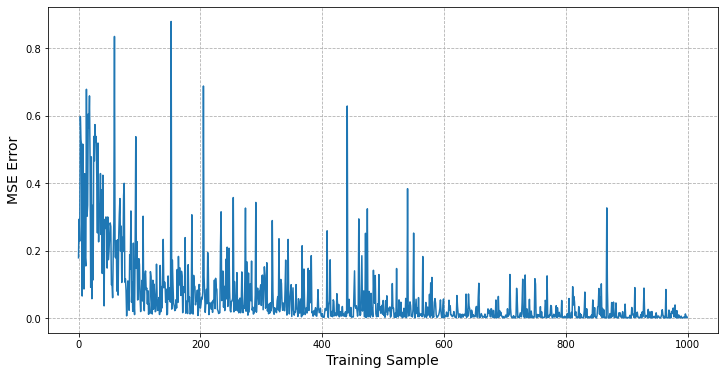

Evaluating Test Data: 100%|██████████| 1000/1000 [00:02<00:00, 448.90it/s]

% Correct: 99.6
% Wrong: 0.4


In [11]:
first_number = 0
second_number = 1

################################# Params #################################
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_zeros = y_train == first_number
train_ones = y_train == second_number

x_train = np.array(list(x_train[train_zeros]) + list(x_train[train_ones]))
y_train = np.array(list(y_train[train_zeros]) + list(y_train[train_ones]))

x_train = (x_train.astype('float32') / 255.).reshape(len(x_train), len(x_train[0])*len(x_train[0][0]))

x_train, y_train = unison_shuffled_copies(x_train, y_train)

x_train, y_train = x_train[:1000], One_Hot_Encode(y_train[:1000])

test_zeros = y_test == first_number
test_ones = y_test == second_number

x_test = np.array(list(x_test[test_zeros]) + list(x_test[test_ones]))
y_test = np.array(list(y_test[test_zeros]) + list(y_test[test_ones]))

x_test = (x_test.astype('float32') / 255.).reshape(len(x_test), len(x_test[0])*len(x_test[0][0]))

x_test, y_test = unison_shuffled_copies(x_test, y_test)

x_test, y_test = x_test[:1000], One_Hot_Encode(y_test[:1000])

input_shape = x_train[0].size
output_shape = y_train[0].size


############################## Build network ##############################

# layer_sequence = [input_shape, 'ReLU', 392, 'ReLU', 196, 'ReLU', 98, 'ReLU', 49, 'sigmoid', output_shape]
layer_sequence = [input_shape, 'ReLU', 100, 'sigmoid', output_shape]

loss_function = 'MSE'
# loss_function = 'Binary Cross-Entropy'

nn = NN(layer_sequence, loss_function) # Build model 

################################# Run it ##################################

nn.train(x_train, y_train, batch_size = 5, epsilon = 0.1, visualize = True)

################################# Testing ##################################

nn.evaluate(x_test, y_test)

# Compare to TensorFlow

In [32]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [33]:
# mnist = tf.keras.datasets.mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0



(x_train, y_train), (x_test, y_test) = mnist.load_data()


zeros_train = y_train == 0
x_train_zeros, y_train_zeros = list(x_train[zeros_train]), list(y_train[zeros_train])
zeros_test = y_test == 0
x_test_zeros, y_test_zeros = list(x_test[zeros_test]), list(y_test[zeros_test])

ones_train = y_train == 1
x_train_ones, y_train_ones = list(x_train[ones_train]), list(y_train[ones_train])
ones_test = y_test == 1
x_test_ones, y_test_ones = list(x_test[ones_test]), list(y_test[ones_test])


x_train, y_train = np.array(x_train_zeros + x_train_ones), np.array(y_train_zeros + y_train_ones)
x_test, y_test = np.array(x_test_zeros + x_test_ones), np.array(y_test_zeros + y_test_ones)


# shuffle arrays

x_train, y_train = unison_shuffled_copies(x_train, y_train)
x_test, y_test = unison_shuffled_copies(x_test, y_test)

x_train = (x_train / 255.)
x_test = (x_test / 255.)

print(x_train.shape)

(12665, 28, 28)


In [34]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='sigmoid')
])
loss_fn = tf.keras.losses.MeanSquaredError()

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 100,738
Trainable params: 100,738
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='SGD',
              loss=loss_fn,
              metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train, batch_size= 10, epochs=5)

Epoch 1/5
1267/1267 [==============================] - 2s 909us/step - loss: 0.1003 - accuracy: 0.5672
Epoch 2/5
1267/1267 [==============================] - 1s 864us/step - loss: 0.0241 - accuracy: 0.5571
Epoch 3/5
1267/1267 [==============================] - 1s 745us/step - loss: 0.0133 - accuracy: 0.5460
Epoch 4/5
1267/1267 [==============================] - 1s 865us/step - loss: 0.0097 - accuracy: 0.5439
Epoch 5/5
1267/1267 [==============================] - 1s 741us/step - loss: 0.0077 - accuracy: 0.5416
